In [1]:
from river import metrics, preprocessing, compose, datasets
from river_torch import classification
from torch import nn
from torch import manual_seed

_ = manual_seed(42)

class MyModule(nn.Module):
    def __init__(self, n_features):
        super(MyModule, self).__init__()
        self.dense0 = nn.Linear(n_features,5)
        self.nonlin = nn.ReLU()
        self.dense1 = nn.Linear(5, 2)
        self.softmax = nn.Softmax(dim=-1)
    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.nonlin(self.dense1(X))
        X = self.softmax(X)
        return X

model_pipeline = classification.Classifier(module=MyModule,
               loss_fn="binary_cross_entropy",
               optimizer_fn='adam')



dataset = datasets.Phishing()
metric = metrics.Accuracy()

for x, y in dataset:
    y_pred = model_pipeline.predict_one(x)  # make a prediction
    metric = metric.update(y, y_pred)  # update the metric
    model_pipeline = model_pipeline.learn_one(x,y)

print(f'Accuracy: {metric.get()}')

Accuracy: 0.6512


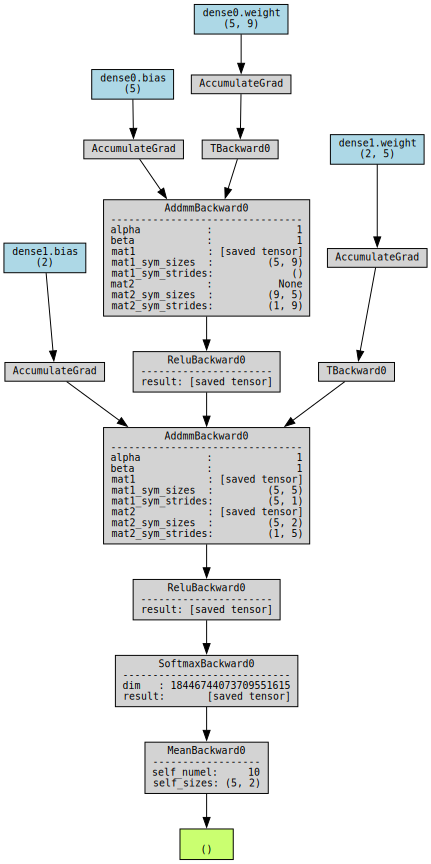

In [2]:
model_pipeline.draw()

In [4]:
dict(model_pipeline.module.named_parameters())

{'dense0.weight': Parameter containing:
 tensor([[ 0.6163,  0.6062,  0.2020,  0.3562, -0.0089, -0.0448, -0.0024,  0.1695,
           0.2564],
         [ 0.2298,  0.6903,  0.3647,  0.3497,  0.1688, -0.0575,  0.0620,  0.3075,
           0.0583],
         [-0.1671,  0.0094, -0.1969, -0.0914, -0.1550,  0.1059, -0.3000, -0.1751,
          -0.0941],
         [-0.2252,  0.0520, -0.2238,  0.3893, -0.0775,  0.5210,  0.1813,  0.2057,
           0.3228],
         [-0.2302,  0.0371, -0.1207, -0.1402, -0.0536, -0.0104,  0.1163,  0.3848,
           0.2090]], requires_grad=True),
 'dense0.bias': Parameter containing:
 tensor([-0.2246,  0.0797, -0.0621,  0.5438, -0.1350], requires_grad=True),
 'dense1.weight': Parameter containing:
 tensor([[-0.6484, -0.0279, -0.2599,  0.7668,  0.1940],
         [ 0.6540,  0.4322, -0.0743,  0.1886, -0.2932]], requires_grad=True),
 'dense1.bias': Parameter containing:
 tensor([ 0.2855, -0.2694], requires_grad=True)}